# Importing Necessary Libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# File path
file_path = '/content/drive/MyDrive/Data Science Projects/ML Intern@CodeAlpha/Task_2_Titanic Dataset/titanic.csv'

df = pd.read_csv(file_path)
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [ ]:
# Checking for Missing Values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

***Note:*** We'll handle the missing data by using Simple Imputer from Scikit Learn Library during Machine Learning Pipeline building.  

In [16]:
# Seeing the Value Counts of all the unique values in each categorical column

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
  print(df[col].value_counts())
  print('--------------------------')

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
--------------------------
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
--------------------------
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34

In [17]:
# Dropping Unnecessary Columns

df.drop(columns = ['PassengerId','Name','Cabin','Ticket'], inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Data Visualizations:

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 61.9 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=dd4ac469d

In [ ]:
# Importing libraries
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [ ]:
dtale.show(df)

https://dskm3kkdtu9-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

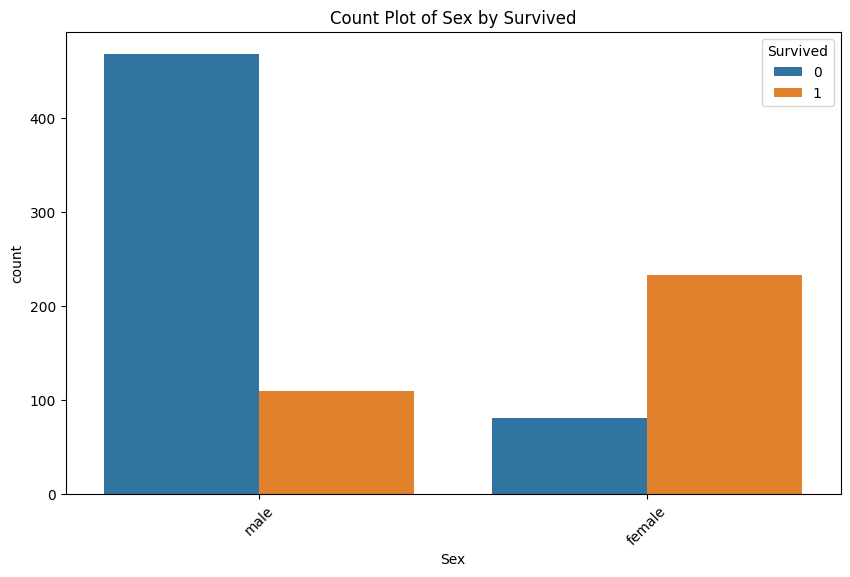

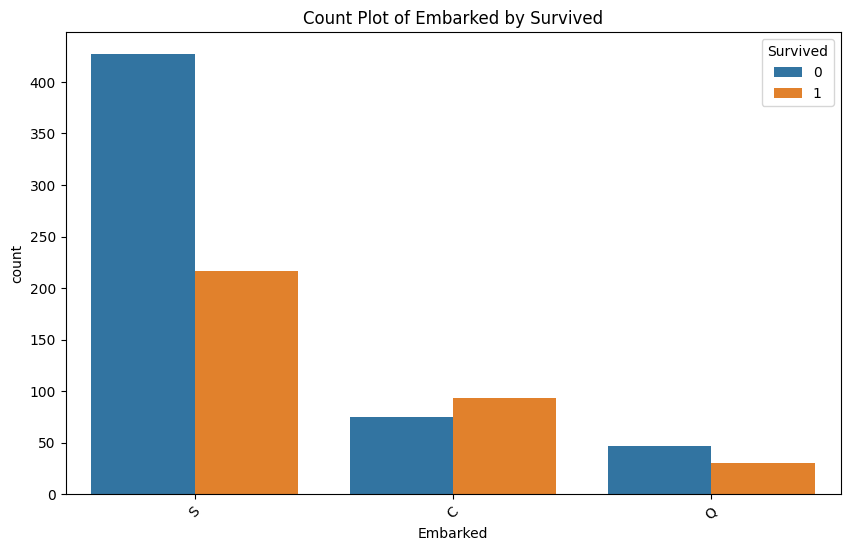

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot count plots for each categorical column with hue='Survived'
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f'Count Plot of {col} by Survived')
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.show()


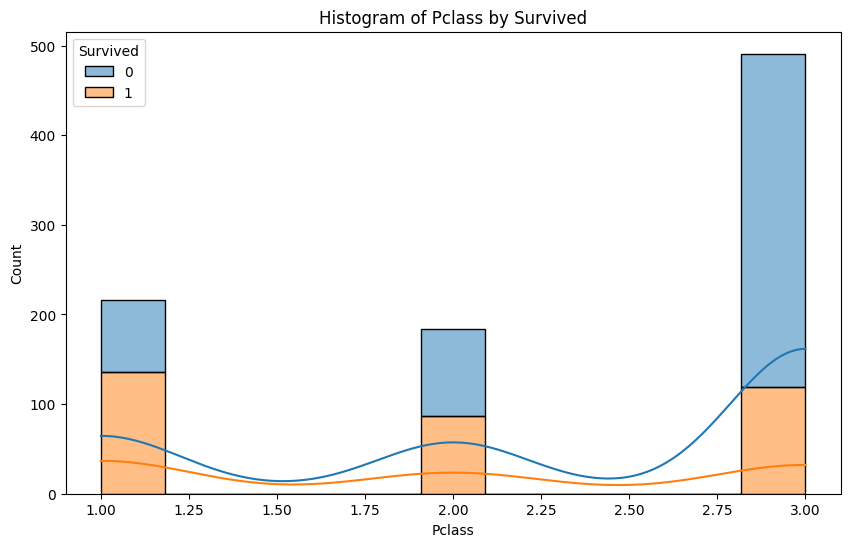

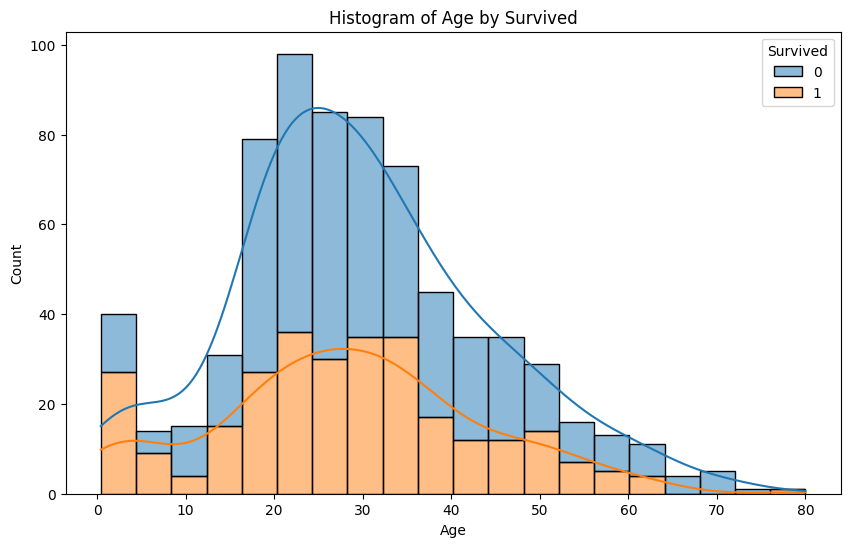

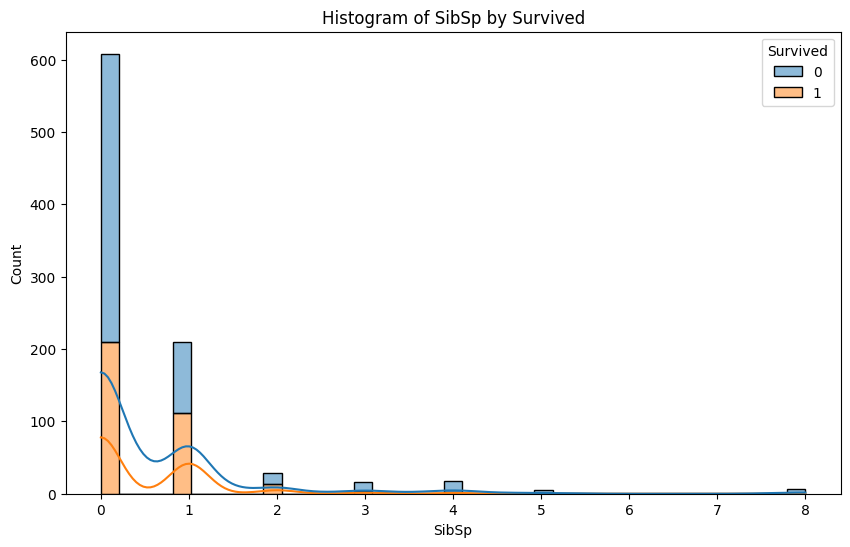

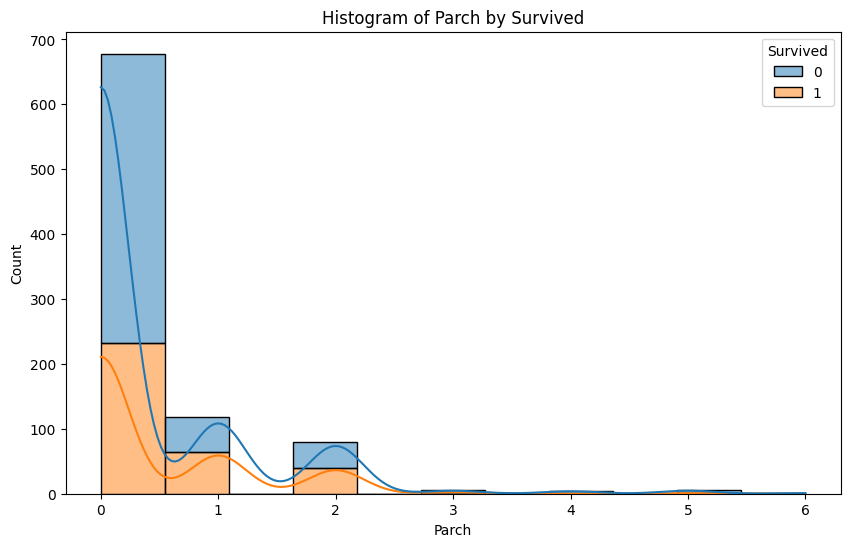

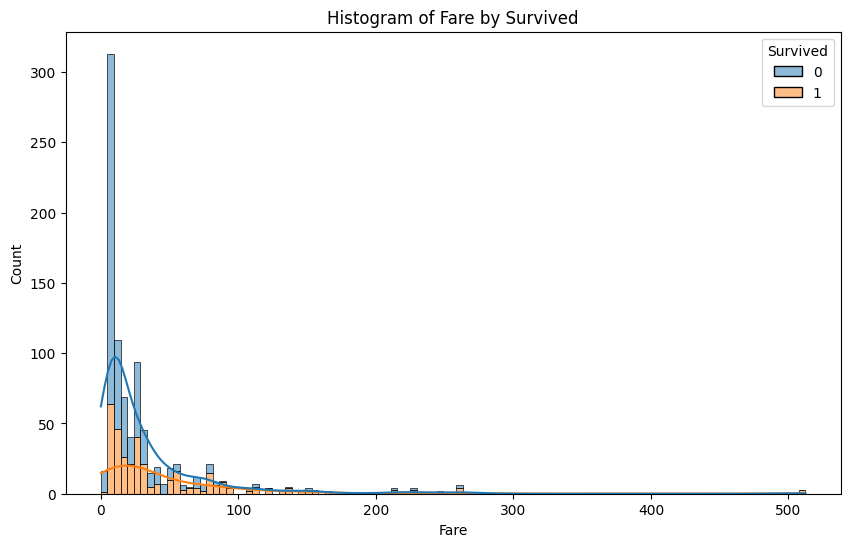

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns
numerical_columns = df.drop(columns='Survived').select_dtypes(include=['number']).columns.tolist()

# Plot histograms for each numerical column with hue='Survived'
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Survived', kde=True, multiple='stack')
    plt.title(f'Histogram of {col} by Survived')
    plt.show()


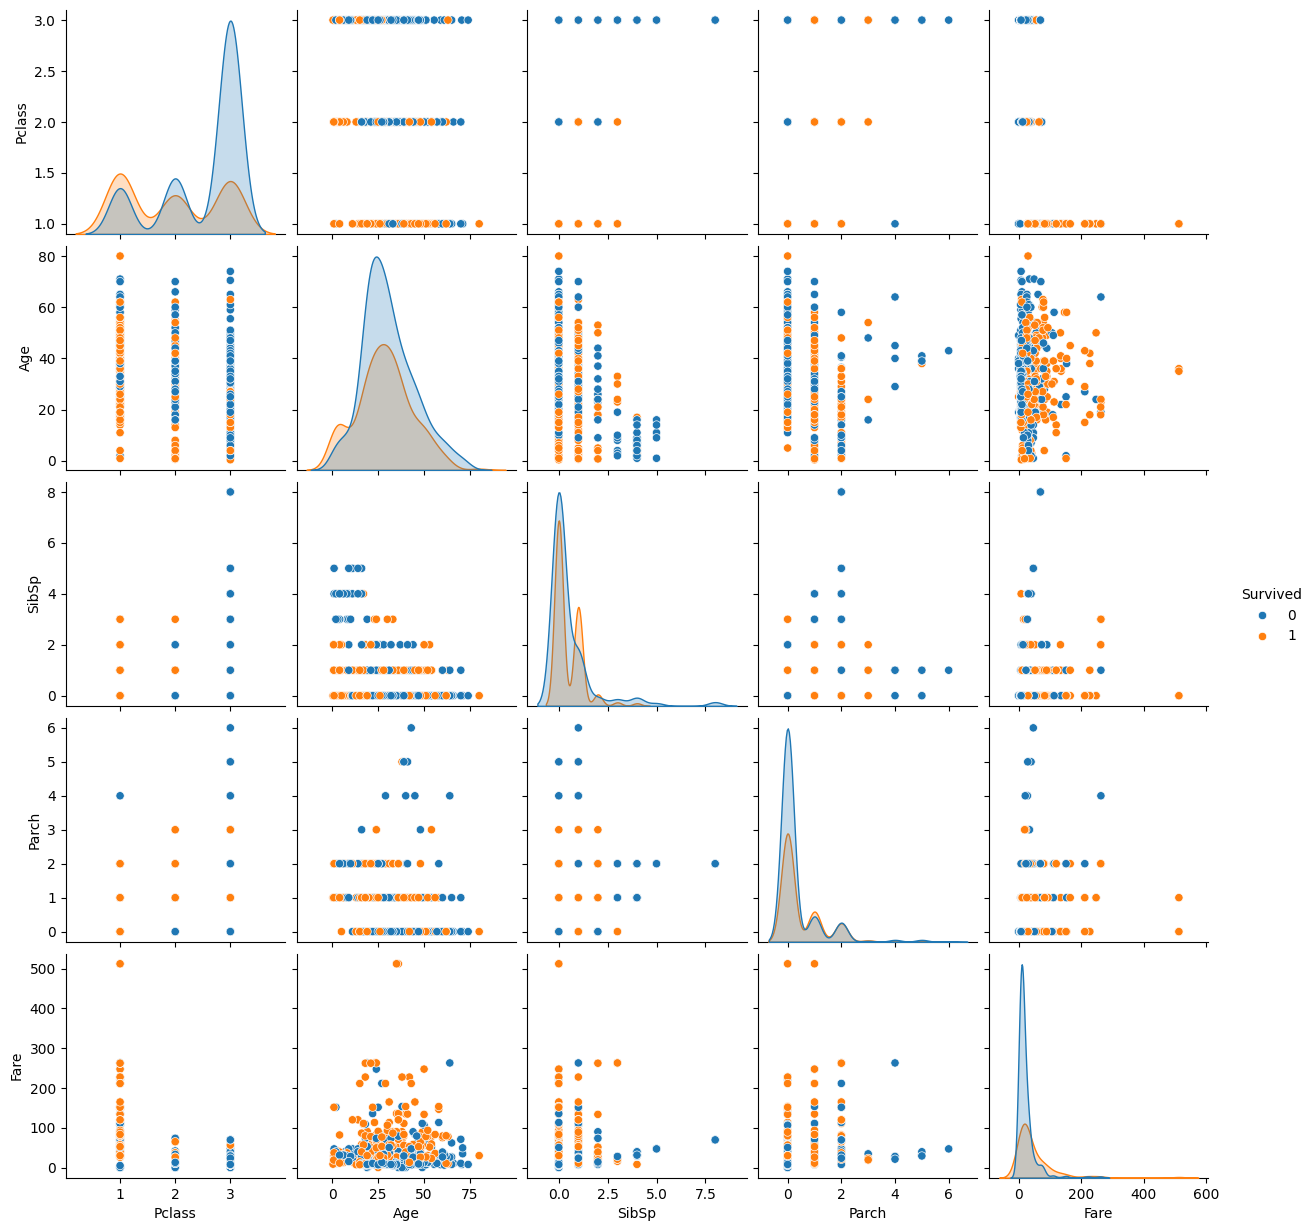

In [21]:
sns.pairplot(df,hue='Survived')

# ML Model Pipeline Building:

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Collect the Data
file_path = '/content/drive/MyDrive/Data Science Projects/ML Intern@CodeAlpha/Task_2_Titanic Dataset/titanic.csv'
df = pd.read_csv(file_path)
df.drop(columns = ['PassengerId','Name','Cabin','Ticket'], inplace = True)

# Step 2: Extract Features and Target
# Assuming 'Survived' is the target variable and rest are features
X = df.drop(columns='Survived')
y = df['Survived']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Column Transformation
# Define which columns are numerical and which are categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop = 'first',handle_unknown='ignore',sparse_output=False))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 5: Build the Pipeline

# Define a function to create a pipeline with a given classifier
def create_pipeline(classifier):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('lda', LinearDiscriminantAnalysis(n_components=1)),
        ('classifier', classifier)
    ])

# Define the classifiers to test
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Define the parameter grid for GridSearchCV
param_grid = [
    {'classifier': [LogisticRegression()], 'classifier__C': [0.1, 1.0, 10.0]},
    {'classifier': [DecisionTreeClassifier()], 'classifier__max_depth': [None, 10, 20, 30]},
    {'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [50, 100, 200,300]},
    {'classifier': [SVC()], 'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']},
    {'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': [3, 5, 7]},
    {'classifier': [GradientBoostingClassifier()], 'classifier__n_estimators': [50, 100, 200,300]}
]




In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize variables to store the best model and its performance
best_model = None
best_score = 0
best_params = None
best_accuracy = 0
best_precision = 0
best_recall = 0

# Loop through each classifier and perform GridSearchCV
for i, params in enumerate(param_grid):
    classifier_name = list(classifiers.keys())[i]
    grid_search = GridSearchCV(create_pipeline(classifiers[classifier_name]), [params], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate the best model from this grid search
    y_pred = grid_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print the performance of the current model
    print(f"{classifier_name} - Best Params: {grid_search.best_params_}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

    # Check if this model is the best so far
    if accuracy > best_score:
        best_model = grid_search.best_estimator_
        best_score = accuracy
        best_params = grid_search.best_params_
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall

# Print the best model and its performance
print("\nBest Model:", best_model)
print(f"Parameters: {best_params}")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")

LogisticRegression - Best Params: {'classifier': LogisticRegression(C=0.1), 'classifier__C': 0.1}, Accuracy: 0.7877094972067039, Precision: 0.7647058823529411, Recall: 0.7027027027027027
DecisionTree - Best Params: {'classifier': DecisionTreeClassifier(max_depth=10), 'classifier__max_depth': 10}, Accuracy: 0.7877094972067039, Precision: 0.8103448275862069, Recall: 0.6351351351351351
RandomForest - Best Params: {'classifier': RandomForestClassifier(n_estimators=300), 'classifier__n_estimators': 300}, Accuracy: 0.776536312849162, Precision: 0.7833333333333333, Recall: 0.6351351351351351
SVC - Best Params: {'classifier': SVC(), 'classifier__C': 1.0, 'classifier__kernel': 'rbf'}, Accuracy: 0.8044692737430168, Precision: 0.8095238095238095, Recall: 0.6891891891891891
KNN - Best Params: {'classifier': KNeighborsClassifier(n_neighbors=7), 'classifier__n_neighbors': 7}, Accuracy: 0.8268156424581006, Precision: 0.8307692307692308, Recall: 0.7297297297297297
GradientBoosting - Best Params: {'cla

In [7]:
# Save the best model to a joblib file
import joblib

final_model_dict = {'Model':best_model ,
                    'Column Transformer': preprocessor
                    }
joblib_file = "Titanic_survivor_predictor_model.joblib"
joblib.dump(final_model_dict, joblib_file)
print(f"Best model saved to {joblib_file}")

Best model saved to Titanic_survivor_predictor_model.joblib


# Loading Model to Predict Unseen Data:

In [8]:
# Load the saved model from the joblib file
joblib_file = "Titanic_survivor_predictor_model.joblib"
best_model_loaded = joblib.load(joblib_file)
print(f"Model loaded from {joblib_file}")

Model loaded from Titanic_survivor_predictor_model.joblib


In [9]:
# load the column transformer
preprocessor = best_model_loaded['Column Transformer']
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [10]:
# load the ML model

model = best_model_loaded['Model']
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('lda', LinearDiscriminantAnalysis(n_components=1)),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

In [12]:
# Function to create a dictionary and convert it to a DataFrame
def create_input_dataframe():
    # Example dictionary with input values
    input_data = {
        'Pclass': [3],
        'Sex': ['male'],
        'Age': [34.5],
        'SibSp': [0],
        'Parch': [0],
        'Fare': [7.8292],
        'Embarked': ['Q']
    }

    # Convert dictionary to DataFrame
    input_df = pd.DataFrame(input_data)
    return input_df



# Create the input DataFrame
input_df = create_input_dataframe()
print("Input DataFrame:")
print(input_df)

# Predict on the new input DataFrame with model pipeline
predictions = model.predict(input_df)

# Print the predictions
print("Predictions on input data:")

if predictions==0:
  print('The Passenger won\'t survive ')
else:
  print('The Passenger Survived')


Input DataFrame:
   Pclass   Sex   Age  SibSp  Parch    Fare Embarked
0       3  male  34.5      0      0  7.8292        Q
Predictions on input data:
The Passenger won't survive 
